# Cardiovascular Diseases Risk Prediction Project

# Authors: Maahum Imran, Mark Feng, Chasindu Kumarasiri, Athavann Thulasiranjan

**Dataset Retrieved From: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset**

**Original Dataset Source: National Center for Chronic Disease Prevention and Health Promotion. 2021 BRFSS Survey Data and Documentation. Kaggle. https://www.cdc.gov/brfss/annual_data/annual_2021.html**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/Chasindu/Cardiovascular-Diseases-Risk-Prediction/main/CVD_cleaned.csv**

# Student Performance Dataset Description

**Attributes for Cardiovascular Diseases Risk Prediction Dataset:**
1. General Health - rating of health (Nominal: Poor, Good, Fair, Very Good, Excellent) 
2. Checkup - when a person had their last checkup (Nominal: 5 or more years ago, Never, Within the past 2 years, within the past year, within the past 5 years)
3. Exercise - during the past month, other than a regular job, does the person participate in physical activities/exercises (Binary: Yes or No) 
4. Skin_Cancer - Respondents reported having skin cancer (Binary: Yes or No) 
5. Other_Cancer - Respondents reported having any other type of cancer (Binary: Yes or No) 
6. Depression - Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression) (Binary: Yes or No)
7. Diabetes - Respondent's reported having diabetes (Nominal: Yes, No, No but prediabetes or borderline diabetes, Yes but female told only during pregnancy) 
8. Arthritis - Respondent's reported having arthritis (Binary: Yes or No) 
9. Sex - Respondents Gender (Nominal: Female or Male) 
10. Age_Category - Category in which respondents age falls under (Nominal: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80+)
11. Height_(cm) - Respondents Height (Numerical: value between 91-241 cm)
12. Weight_(kg) - Respondents Weight (Numerical: value between 24.95 - 293.02 kg)
13. BMI - Respondents Body Mass Index (Numerical: value between 12.02 - 99.33) 
14. Smoking_History - Does Respondent have a history of smoking (Binary: Yes or No) 
15. Alcohol_Consumption	 - How many days in the last month did the respondent consume alcohol (Numerical: value between 0 to 30) 
16. Fruit_Consumption - How many fruits (fruit items included) has the respondent eaten in the last month (Numerical: value between 0-120)
17. Green_Vegetables_Consumption - how many vegetables (vegetable items included) has the respondent eaten in the last month (Numerical: value between 0-128)
18. FriedPotato_Consumption - how many fried potatoes (fried potato items such as french fries) has the respondent eaten in the last month (Numerical: value between 0-128)
19. Heart_Disease - does the person have heart disease (coronary heart disease or myocardial infarction) (Binary: Yes or No) - Output Target 

# 1- Framing the Problem and Looking at the Big Picture

## Frame the Problem
1. Supervised learning
        - Training examples/attributes are labelled within the dataset
2. Classification task
        - Predict category in which data falls under pertaining to if person has heart disease or not (Yes or No output)
3. Batch learning 
    - Small/Fixed data set
    - No continuous/rapidly changing flow of data coming into the system - all data exists within the dataset only

## The Big Picture

Our task is to predict whether a person has or is prone to heart disease, in order to help doctors diagnose patients quicker and easier. This model can also be used by people who want to check if they have or are close to getting heart disease. Overall, by using this dataset we hope to achieve medical diagnosis of patients in a simple and effective manner. 

## Importing Libraries

In [1]:
#Importing Useful Libraries to be used within our project
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Description of Dataset and EDA

In our dataset, we have 308,854 samples and 19 features with 3 different data types (nominal, binary and numerical). We have 5 nominal features that are; general health, checkup, diabetes, sex and age category. In addition, we also have 7 numerical features which are; height (cm), weight (kg), BMI, alcohol consumption, fruit consumption, green vegetable consumption and fried potato consumption. Lastly, we have 7 binary features which are; exercise, skin cancer, other cancer, depression, arthritis, smoking history and lastly, our target feature, heart disease.


## Loading the Dataset

In [2]:
#Load URL of Dataset from our Project's GitHub
url = "https://raw.githubusercontent.com/Chasindu/Cardiovascular-Diseases-Risk-Prediction/main/CVD_cleaned.csv"
#Read the Dataset from URL
df = pd.read_csv(url, sep=',')

# Created Backup Dataset
df_backup = df

## 2.1 Data Structure

The following portion will be looking briefly at the dataset and examining it's attributes/features, what kinds of samples are in the dataset, and what values exist for each attribute. This will allow us to get a better understanding of the data we will be working with

### Brief Look at the Dataset

In [3]:
#Taking a look at our dataset as a whole
#Allows us to see what attributes are in our dataset and a brief look at what types of values (Nominal or n=Numerical)
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


### Looking at the first 5 entries in the dataset

In [4]:
#Take a look at the first 5 entries within the dataset
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Description of the numerical attributes within the Dataset

In [5]:
#Creates a description of all the numerical attributes within our dataset with values such as count, mean, min, max etc, 
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Show Dataset Info including attributes names (columns), non-null count and data type

In [6]:
#Shows us all the columns in the dataset with their non-null count and data type 
#From this, we can derive there are no missing values within our dataset as all the values = amount of samples(rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Note: we can see that there are no null values in this dataset as all the non-null counts add up to the total amount of samples

### Counts of the categories for specific attributes
Doing this will allow us to see the count distribution of the categories for specific features

In [7]:
#Shows which categories exist for Heart Disease target output and how many rows belong to each category 
#Shows the skew in values for people who have heart disease to people who do not
df["Heart_Disease"].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [8]:
#Shows which categories exist for Diabetes target output and how many rows belong to each category 
df["Diabetes"].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [9]:
#Shows which categories exist for Checkup target output and how many rows belong to each category 
df["Checkup"].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

In [10]:
#Shows which categories exist for General Health target output and how many rows belong to each category 
df["General_Health"].value_counts()

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

## 2.2 Exploratory Data Analysis (EDA)

In the following section we will be exploring the dataset in more depth and analyzing trends/patterns. This will allow us to understand what exactly the attributes in our dataset, what values exist for them, and the skew in our dataset.

### Pair Plot - plot of the numerical attributes within the dataset, colored for people with/without heart disease

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

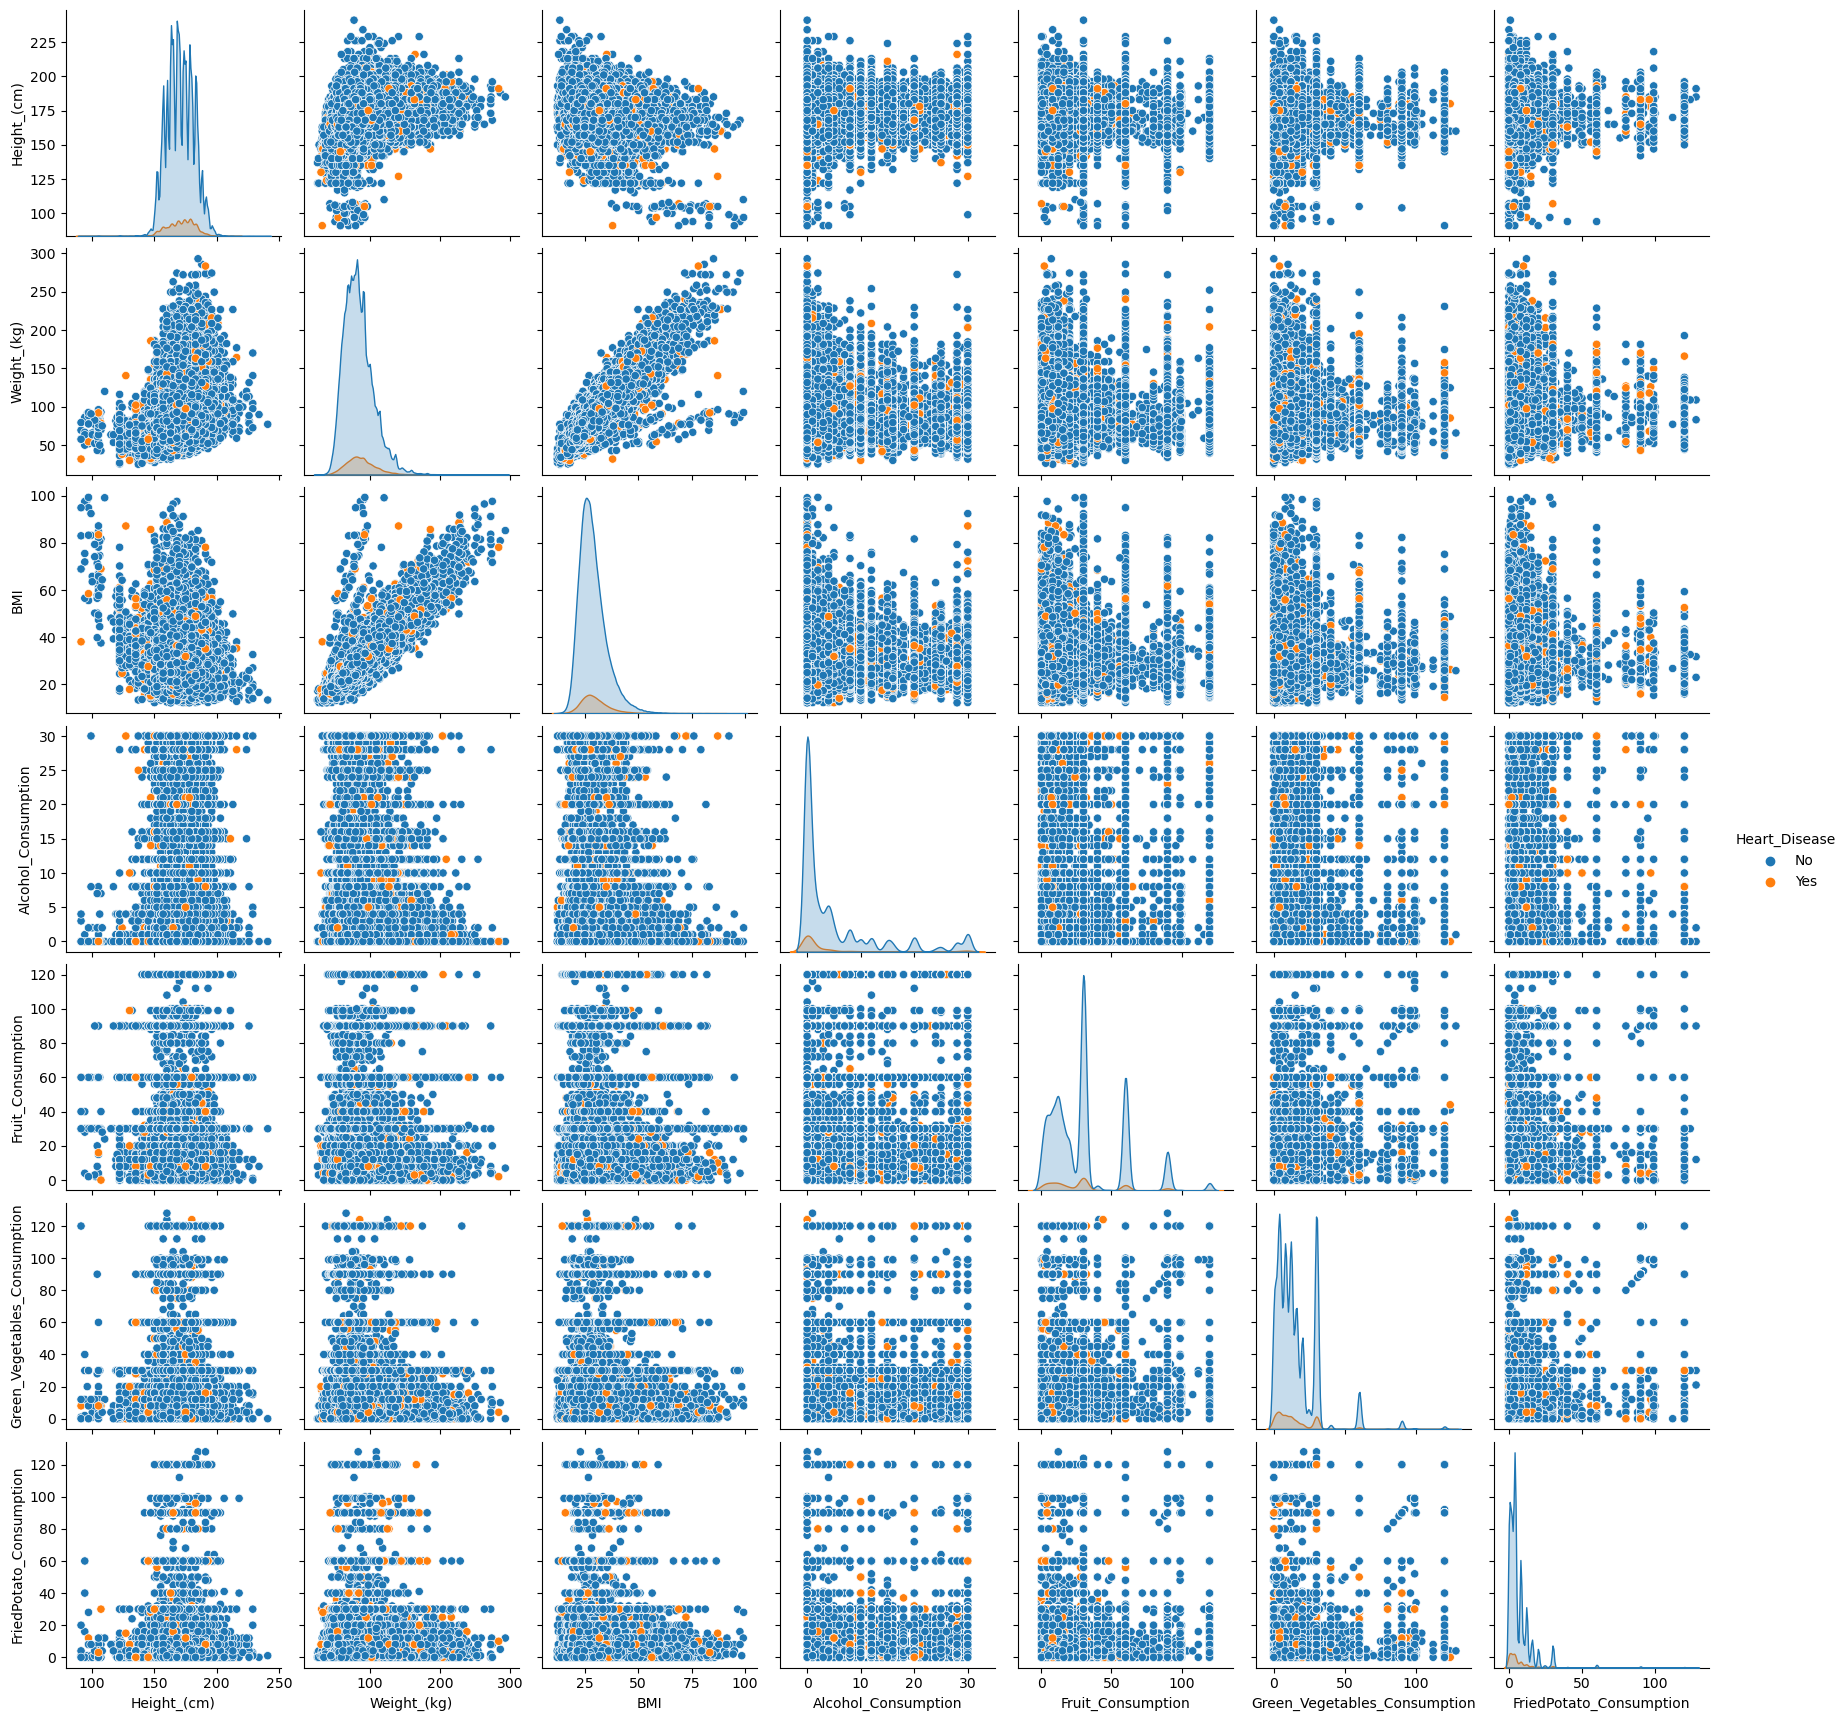

In [11]:
#use seaborn to pairplot, use the hue parameter to color the data points based on the Heart Disease categorical variable. 
sns.pairplot(df, hue="Heart_Disease")

Note: The pair plot shows the numerical values of our dataset, plotted against each other. We also coloured the points in the plots according to if the person had heart disease or not. Through this plot, similar to a correlation matrix, we can see that there are no apparent trends in these features. In the example shown, we see the general look of all the plots, and how they do not have a significant pattern to them. We are also able to see the large skew in values existing for people with heart disease. In our dataset, there is an overwhelming amount of people without heart disease then there is people with, and we can accurately see that through this coloured plot. 

### Pie Chart - shows the ratio of samples that fit within each category of specific attributes

<Axes: >

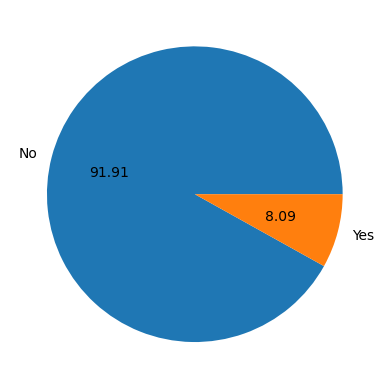

In [12]:
# Shows the ratio of people with heart disease to people without heart disease within our dataset -notice: the skew in data out of approx 300,000 samples 
df.groupby('Heart_Disease').size().plot(kind='pie', autopct='%.2f')

Note: This pie chart depicting the distribution of samples positive and negative for heart disease shows a very significant imbalance, with approximately 91.91% of individuals negative for heart disease and only 8.09% being positive. This imbalance will have a heavy impact on our training process.

<Axes: >

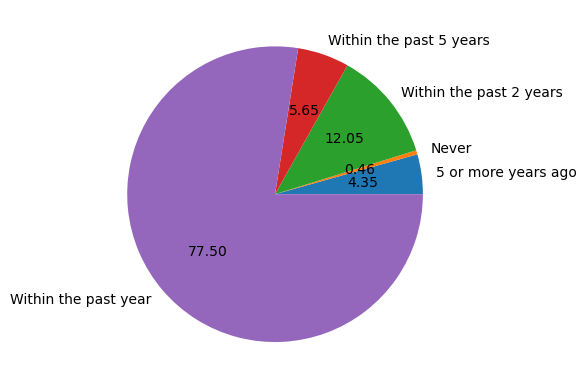

In [13]:
# Shows the ratio between the values of Checkup in the dataset 
df.groupby('Checkup').size().plot(kind='pie', autopct='%.2f')

Note: This pie chart illustrates the timing of individuals' most recent medical checkups and indicates that the majority (77.5%) have had their most recent checkup within the past year. 12.05% of individuals had a checkup within the past 2 years, 5.65% reported undergoing a checkup within the past 5 years, 4.35% of individuals had their last checkup five or more years ago, and 0.46% of individuals reported never having had a medical checkup. It is immediately clear that the overwhelming majority of individuals had their most recent checkup within the past year, while longer intervals between checkups become increasingly rare. This may, however, be selection bias due to more health-conscious individuals being more likely to accept a health-related survey.

### Violin Plot - shows the distribution of values between the X-axis and Y-axis

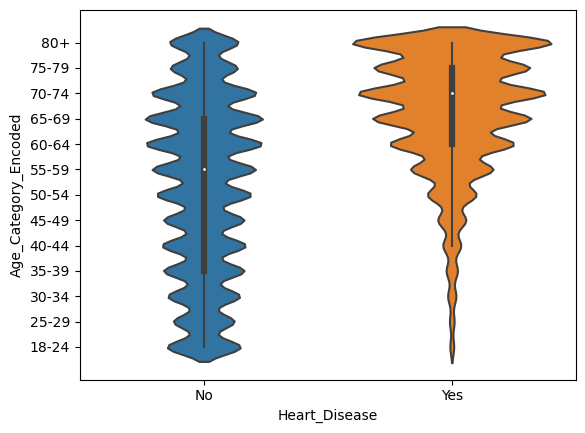

In [14]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
#assign Label Encode
label_encoder = LabelEncoder()
#Create temporary dataset
temp_df_violin = df.copy()
# Encode the Age_Category column
temp_df_violin['Age_Category_Encoded'] = label_encoder.fit_transform(temp_df_violin['Age_Category'])
# Create the violin plot
sns.violinplot(x='Heart_Disease', y="Age_Category_Encoded", data=temp_df_violin)
# Decode the labels for better visualization
plt.yticks(ticks=temp_df_violin['Age_Category_Encoded'].unique(), labels=label_encoder.inverse_transform(temp_df_violin['Age_Category_Encoded'].unique()))
# Show the plot
plt.show()

Note: Lastly, the violin plot comparing age groups with the presence of heart disease reveals a strong correlation between heart disease and age group. Among individuals without heart disease, the age distribution is relatively uniform, with slight spikes in the age categories 55-59, 60-64, and 65-69. In contrast, among those positive for heart disease, there is a clear trend of an increasing amount of cases with older age. The concentration is highest for individuals aged 65 and above, while there are very few instances of heart disease among individuals aged 45 and younger. The gradual increase of heart disease cases with higher age and the gradual decrease with lower age shows the significant correlation between older age and the likelihood of developing heart disease.

### Count Plot - Bar graph showing the count of people within the categories of the Y-axis (and showing the difference in count between people with/without heart disease)

We used a count plot to measure the variables of sex, general health, and smoking history. Our hue for the count plots was heart disease, our target feature, as it shows us the relationship between heart disease and the aforementioned variables.

<Axes: xlabel='Smoking_History', ylabel='count'>

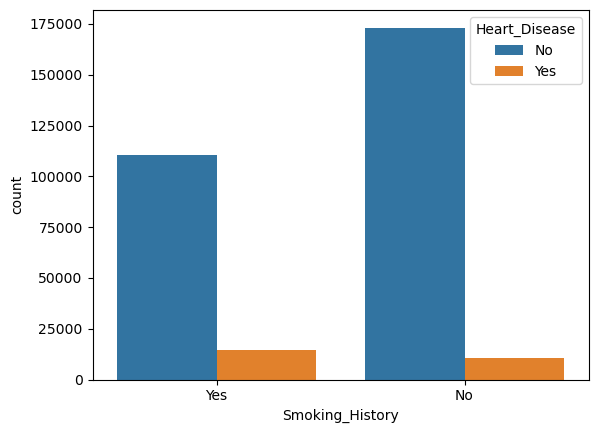

In [15]:
#Show the number of people with/without a smoking history and how many of those people have Heart Disease
sns.countplot(df, x="Smoking_History", hue="Heart_Disease")

Note: The main trend we see in the smoking history count plot is the fact that there is a slight increase of people who have a smoking history to have heart disease or those who do not have a smoking history. We can also see that people who have a smoking history that do not have heart disease are much less in count to the people who do not have a smoking history, with no heart disease.

<Axes: xlabel='Sex', ylabel='count'>

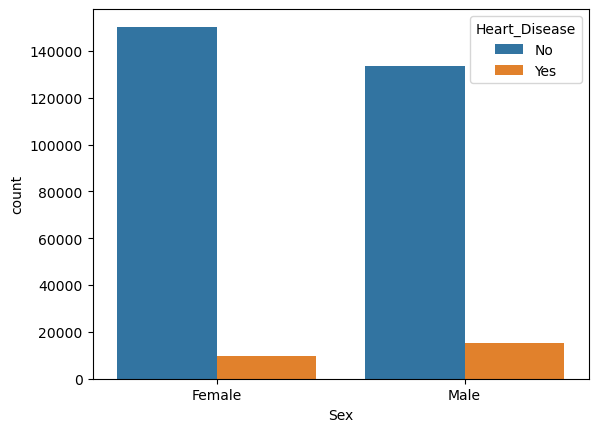

In [16]:
#Show the number of people who are Male/Female and how many of those people have Heart Disease
sns.countplot(df, x="Sex", hue="Heart_Disease")

Note: For the sex count plot, we see that there are more females than males that do not have heart disease. And we can also see there are slightly more males that have heart disease over females.

<Axes: xlabel='General_Health', ylabel='count'>

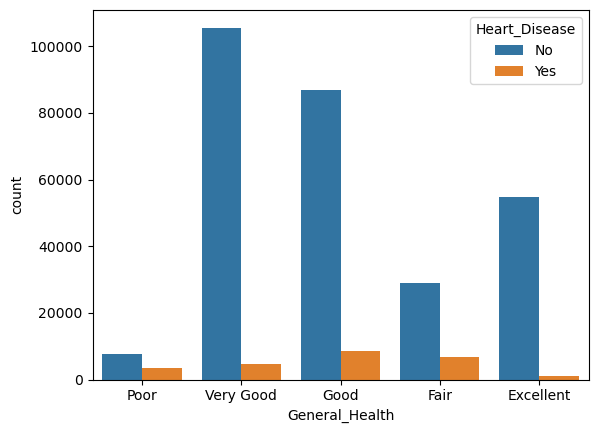

In [17]:
#Show the number of people with poor to excellent General Health and how many of those people have Heart Disease
sns.countplot(df, x="General_Health", hue="Heart_Disease")

Note: For the general health count plot, the majority of the people who do not have heart disease have good, very good, or excellent general health. Meanwhile, we can see there is less count of people in fair and poor health without heart disease. We can also see, most people with heart disease fall in the “good” and “fair” health categories. 


# 3. Data Cleaning and Pre-Processing

In this section we are going to take our data and apply some cleaning to it (i.e., removing the duplicates) as well as encoding our categorical attributes and scale our numerical attributes. 

## 3.1 Check and Remove Duplicate Rows

In [18]:
# Check for duplicate rows
df.duplicated().sum()

80

In [19]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

Note: It is essential to delete duplicate rows, as it can significantly affect the quality, accuracy, and reliability of our data. This can lead to inaccurate results when testing the data. 

## 3.2 Check for Missing Values

In [20]:
# Find the number of missing values in each column
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

Note: As shown above, since there are no missing values, we do not need to do any removal of columns/attributes, however we do cover the potential of there being a few missing values (in case we add data to the dataset in the future and that data has some missing values) within our pipeline

## 3.3 Encoding and Pipelining Data

In [21]:
#Importing all the libraries needed for the pipelining and encoding process
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Creation of Pipeline with Data Encoding

In [22]:
#seperate the numerical and non-numerical (categorial) columns
numerical_columns = df.select_dtypes(include='number').columns.to_list() #numerical columns
categorical_columns = df.select_dtypes(exclude='number').columns.to_list() #categorical columns

#create pipelines for the numerical and categorical columns
#numercial pipeline use StandardScaler to Scale the values and fill in missing values that the average value in that column
numerical_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()) 
#Categorical pipeline using OneHotEncoder to encode the data, and filling in potential missing values with the most frequent method
categorical_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='if_binary'))

#use ColumnTransformer to apply the data to the pipelines 
preprocessing = ColumnTransformer([('num', numerical_pipe, numerical_columns),
                                   ('cat', categorical_pipe, categorical_columns)],
                                    remainder='passthrough')
#Show the processing format
preprocessing


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Height_(cm)', 'Weight_(kg)', 'BMI',
                                  'Alcohol_Consumption', 'Fruit_Consumption',
                                  'Green_Vegetables_Consumption',
                                  'FriedPotato_Consumption']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['General_Health', 'Checkup', 'Exercise',
                                  'Heart_Disease', 'Skin_Cancer',
                                  'Other_Cancer', 'Depression', 'Diabetes',
                                  'Arthritis', 'Sex', 'Age_Category',
                                  'Smoking_History'])])

Note: The preprocessing pipeline we have created will help fill any missing values, whether they are numerical or categorical. For numerical, we fill with the mean value of the column, and for categorical features, we fill with the most frequent value. We use StandardScaler to scale the numerical columns and OneHotEncoder to encode the categorical values.

### Apply the Transformation on the Data

In [23]:
# Apply the preprocessing pipeline on the dataset
df_prepared = preprocessing.fit_transform(df)

# Add the column headers back to the data
feature_names=preprocessing.get_feature_names_out()
df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

#Show the info of the new dataset (after transformation and pipeline)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308774 entries, 0 to 308773
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   num__Height_(cm)                                          308774 non-null  float64
 1   num__Weight_(kg)                                          308774 non-null  float64
 2   num__BMI                                                  308774 non-null  float64
 3   num__Alcohol_Consumption                                  308774 non-null  float64
 4   num__Fruit_Consumption                                    308774 non-null  float64
 5   num__Green_Vegetables_Consumption                         308774 non-null  float64
 6   num__FriedPotato_Consumption                              308774 non-null  float64
 7   cat__General_Health_Excellent                             308774 non-null  float64
 8   cat_

### Clean up the Column Names

In [24]:
#Remove the "num__" and "cat__" from the column names from the newly prepared dataset
df_prepared.columns = [col.split('__', 1)[-1] for col in df_prepared.columns]

### Correlation Matrix

In [25]:
#Print the correlation Matrix of just the correlation of each attribute in relation to the target output Heart Disease
corr_matrix = df_prepared.corr(numeric_only=True)
corr_matrix['Heart_Disease_Yes']

Height_(cm)                                            0.015783
Weight_(kg)                                            0.045854
BMI                                                    0.042642
Alcohol_Consumption                                   -0.036614
Fruit_Consumption                                     -0.020045
Green_Vegetables_Consumption                          -0.024027
FriedPotato_Consumption                               -0.009249
General_Health_Excellent                              -0.105118
General_Health_Fair                                    0.144435
General_Health_Good                                    0.023950
General_Health_Poor                                    0.169679
General_Health_Very Good                              -0.101684
Checkup_5 or more years ago                           -0.043304
Checkup_Never                                         -0.009839
Checkup_Within the past 2 years                       -0.056346
Checkup_Within the past 5 years         

# 4. Training and Evaluation of Machine Learning Algorithms

In this section, we will be creating our training/test set data and applying three different machine learning algorithms to the data. We will then gather performance metrics for each model and compare which one is the most accurate

## 4.1 Create the Training/Test set 

### Split 80% training set and 20% Testing set

In [26]:
#Import splitting library that will split the dataset
from sklearn.model_selection import train_test_split

#Split the data - 80/20
df_train, df_test = train_test_split(df_prepared, test_size=0.2, random_state=15)

### Dealing with the Imbalance in the Training Set - **Undersampling Technique**

Because we have a Binary Classification Dataset that is heavily skewed with a large portion of people not having heart disease, this will cause some issues when we train our models. In order to combat the imbalance, we are applying the Undersampling technique to our training set in order to balance it. This will allow us to maximize accuracy and reduce errors when applying the machine learning algorithms.

In [27]:
#Split the training set into two seperate sets, one for the people without heart disease and the other of people with heart disease
df_heart_disease_0 = df_train[df_train["Heart_Disease_Yes"] == 0]
df_heart_disease_1 = df_train[df_train["Heart_Disease_Yes"] == 1]

#Calculate the minimum between people with/without heart disease - in our case we know the minimum lies in the people with heart disease
samples_per_category = min(len(df_heart_disease_0), len(df_heart_disease_1))

#Get random sample out of the people without heart disease, equal to the number of samples calculated above (the minimum)
sample_heart_disease_0 = df_heart_disease_0.sample(n=samples_per_category, random_state=15)
#Get random sample out of the people with heart disease, equal to the number of samples calculated above (the minimum) [in our case, this will be all the samples that exist since this is our minimum]
sample_heart_disease_1 = df_heart_disease_1.sample(n=samples_per_category, random_state=15)

#Add the random sampled cases of people without heart disease to the sample of people with heart disease to create a balanced training dataset
balanced_sample = pd.concat([sample_heart_disease_0, sample_heart_disease_1])
balanced_sample = balanced_sample.sample(frac=1, random_state=15)

#Save our new training dataset to new variable name 
df5050 = balanced_sample

#Show the general information of our newly created training set
df5050.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40110 entries, 303988 to 98200
Data columns (total 42 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          40110 non-null  float64
 1   Weight_(kg)                                          40110 non-null  float64
 2   BMI                                                  40110 non-null  float64
 3   Alcohol_Consumption                                  40110 non-null  float64
 4   Fruit_Consumption                                    40110 non-null  float64
 5   Green_Vegetables_Consumption                         40110 non-null  float64
 6   FriedPotato_Consumption                              40110 non-null  float64
 7   General_Health_Excellent                             40110 non-null  float64
 8   General_Health_Fair                                  40110 non-nul

### Seperate/Drop the Target Variable from Training/Test Set

In [28]:
#Seperate the target output "Heart Disease" from the Training Set
X_train, y_train = df5050.drop(columns=['Heart_Disease_Yes']), df5050['Heart_Disease_Yes']
#Seperate the target output "Heart Disease" from the Test Set
X_test, y_test = df_test.drop(columns=['Heart_Disease_Yes']), df_test['Heart_Disease_Yes']

## 4.2 Apply Training Set to Machine Learning Algorithms

### Import Libraries for all the Models

In [29]:
#Importing Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Import libraries that will help in choosing parameters for our model
from sklearn.model_selection import GridSearchCV

#Importing Performance Metrics Libraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

### Machine Learning Algorithm 1 - **Logistic Regression**

Logistic Regression predicts outcome (binary classifier in this case) based on set of independant variables. Similar to Linear Regression as it assigns model parameters to each feature, weighted from 0 to 1. Logistic Regression uses the probability of an example belonging to the outcome class. These weights are used to correctly classify the test set examples. Logistic regression tends to follow a sigmoid function, an S-curved shape between y = [0,1]. 

#### Search for Best Parameters
By using GridSearchCV, we can run our model multiple times with different parameters and test for accuracy to see which parameters lead to the best results 

In [30]:
#create grid of different values for parameters to run
grid = {'C' : [0.1, 1, 2, 50],
        'max_iter' : [1000, 1750, 2000]}

#Run the grid of parameters with Logistic Regression and cv=5 (k-fold/cross val accuracy testing)
log_search = GridSearchCV(LogisticRegression(random_state=15), param_grid=grid, cv=5, return_train_score=True)

#Fit the best resulting model with the Training Set
log_search.fit(X_train, y_train)

#Print the best parameters
print(log_search.best_params_)

{'C': 50, 'max_iter': 1000}


#### Apply the Model (Logistic Regression) to the Training Set

In [31]:
#Create a model for Logistic Regression, setting maximum iterations taken for the solvers to converge at 1000 which is a generic amount for a large dataset
#model = LogisticRegression(C=1, max_iter=1000, random_state=15)
model = LogisticRegression(C=1, max_iter=1000, random_state=15)

#Fit the training set with the machine learning model
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=15)

#### Calculate Performance of Model
We will be using classification report, roc score and cross-val score to determine accuracy of model

In [32]:
#Create the prediction results for the test set from the model
y_pred = model.predict(X_test)

#Print the classification report for the model
print (classification_report(y_test, y_pred))

#Print the ROC score for the model
y_score1 = model.predict_proba(X_test)[:,1]
print('ROC Score', format(roc_auc_score(y_test, y_score1), ".4f"))

#Print the cross validation score with 5-folds 
log_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {format(log_scores.mean(), ".4f")}')

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     56839
         1.0       0.20      0.78      0.32      4916

    accuracy                           0.74     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.74      0.80     61755

ROC Score 0.8342
Cross-Validation Mean Accuracy: 0.7597


### Machine Learning Algorithm 2 - **SVC (Support Vector Classifier)**

Support Vector Classifier is a specific implementation of the Support Vector Machine that is used for classification tasks. The Support Vector machine is a machine learning model that helps solve classification and regression problems. SVC seeks to find the "best-fit" hyperplane that best seperates the data points into different classes, in our case, binary classification of Heart Disease. In this case, we use standard SVC which implements a one vs. one (OvO) method. 

#### Search for Best Parameters
By using GridSearchCV, we can run our model multiple times with different parameters and test for accuracy to see which parameters lead to the best results 

In [33]:
#create grid of different values for parameters to run
svc_params = {'kernel': ['rbf'], #default kernel, we tested with 'poly' kernel but did not improve the model and increased memory consumption and compiling time
                  'C': [0.1, 1, 10],
                  'gamma': [0.001, 0.01, 1]
                }

#Run the grid of parameters with SVC
svc_grid = GridSearchCV(SVC(random_state=15), param_grid = svc_params)

#Fit the best resulting model with the Training Set
svc_grid.fit(X_train, y_train)

#Print the best parameters
print(svc_grid.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


#### Apply the Model (SVC) to the Training Set

In [34]:
#Create a model for SVC, setting parameters to the ones calculated from GridSearchCV
clf = SVC(kernel='rbf', C=1, gamma=0.01)

#Fit the training set with the machine learning model
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

#### Calculate Performance of Model
We will be using classification report, roc score and cross-val score to determine accuracy of model

In [35]:
#Create the prediction results for the test set from the model
y_pred2 = clf.predict(X_test)

#Print the classification report for the model
print (classification_report(y_test, y_pred2))

#Calculate ROC score for SVC model
y_score2 = clf.decision_function(X_test)
print('AUC/ROC score: ', roc_auc_score(y_test, y_score2))

#Print the cross validation score with 5-folds 
log_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {format(log_scores.mean(), ".4f")}')

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     56839
         1.0       0.19      0.81      0.31      4916

    accuracy                           0.72     61755
   macro avg       0.59      0.76      0.57     61755
weighted avg       0.91      0.72      0.78     61755

AUC/ROC score:  0.8339086680690643
Cross-Validation Mean Accuracy: 0.7610


### Machine Learning Algorithm 3 - **Random Forest Classifier**

Random Forest is a method that uses multiple base models to improve prediction accuracy. Applied to decision trees, Random Forest Classifier creates a variety of decision trees, each trained using a random subset of the overall data and a random subset of the features, hence why we consider Random Forest Classifier as an extension to Decision Tree Classifier. A majority vote is then taken from these trees and the most popular class is outputted by the model.  

#### Calculating Better Performing Model between Decision Tree Classifier and Random Forest Classifier 
Since we know that the Random Forest model is an extension to the Decision Tree model, we want to show why we have chosen Random Forest over Decision Tree. We are testing both, using their default parameters to understand which model will best fit our data. Based on this, we can use the assumption that no matter the optimization of parameters, the more accurate model will fit our data better since they are closely related.

In [36]:
#Trying Decision Tree Classifier versus Random Forest Classifier [to see which model would be better we are going to use the default parameters for each]
#Since Random Forest is an extension to Decision Tree, the default parameters in this case will be the exact same

#Testing for Decision Tree Classifier
test_model = DecisionTreeClassifier(random_state=15)
#Fitting Decision Tree Classifier on our Training Set
test_model.fit(X_train, y_train)

#Testing for Random Forest Classifier
test_model2 = RandomForestClassifier(random_state=15)
#Fitting Random Forest Classifier on our Training Set
test_model2.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

#### Performance Metrics Calculation for Both Models

In [37]:
#Print Performance Metrics for both Models to see which one is better
#Create the prediction results for the test set from the model
y_pred_test = test_model.predict(X_test) #decision tree
y_pred_test1 = test_model2.predict(X_test) #random forest

#Print the classification reports for the models
print ('Decision Tree: ', classification_report(y_test, y_pred_test))
print ('Random Forest: ', classification_report(y_test, y_pred_test1))

#Print the ROC scores for the models
y_score_test = test_model.predict_proba(X_test)[:,1]
print('Decision Tree ROC score: ', roc_auc_score(y_test, y_score_test))

y_score_test1 = test_model2.predict_proba(X_test)[:,1]
print('Random forest ROC Score: ', roc_auc_score(y_test, y_score_test1))

#Print the cross validation scores with 5-folds 
score_tree = cross_val_score(test_model, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy for Decision Tree: {score_tree.mean()}')

score_tree2 = cross_val_score(test_model2, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy for Random Forest: {score_tree2.mean()}')

Decision Tree:                precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     56839
         1.0       0.15      0.67      0.24      4916

    accuracy                           0.66     61755
   macro avg       0.55      0.66      0.51     61755
weighted avg       0.89      0.66      0.74     61755

Random Forest:                precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     56839
         1.0       0.19      0.78      0.31      4916

    accuracy                           0.72     61755
   macro avg       0.58      0.75      0.57     61755
weighted avg       0.91      0.72      0.78     61755

Decision Tree ROC score:  0.6641538489849801
Random forest ROC Score:  0.8212347493844081
Cross-Validation Mean Accuracy for Decision Tree: 0.6615557217651459
Cross-Validation Mean Accuracy for Random Forest: 0.7496384941411119


#### Conclusion
From the results generated above, we can clearly see that Random Forest Classifier is a better fit for our data. The accuracy is 6% higher with better recall and precision values. The ROC score is higher and the Cross Validation score with 5-folds is also higher. By comparing these performance metrics, we can clearly see that Random Forest Classifier is the more accurate model for our dataset.

Hence, we will be proceeding with Random Forest Classifier as our third Machine Learning Algorithm

#### Search for Best Parameters for Random Forest Classifier
By using GridSearchCV, we can run our model multiple times with different parameters and test for accuracy to see which parameters lead to the best results

In [38]:
#create grid of different values for parameters to run
params = {'max_leaf_nodes' : list(range(95,110)),
        'min_samples_split' : range(2,4),
        'max_depth': range(5,10)}

#Run the grid of parameters with Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=15), params, cv=5)

#Fit the best resulting model with the Training Set
grid_search.fit(X_train, y_train)

#Print the best parameters
print(grid_search.best_params_)

{'max_depth': 9, 'max_leaf_nodes': 109, 'min_samples_split': 2}


#### Apply the Model (Random Forest Classifier) to the Training Set

In [39]:
#Create a model for Decision Tree classifier, setting parameters to the ones calculated from GridSearchCV
model_tree = RandomForestClassifier(min_samples_split=3, max_leaf_nodes=108, max_depth=9, random_state=15)

#Fit the training set with the machine learning model
model_tree.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=108, min_samples_split=3,
                       random_state=15)

#### Calculate Performance of Model
We will be using classification report, roc score and cross-val score to determine accuracy of model

In [40]:
#Create the prediction results for the test set from the model
y_pred3 = model_tree.predict(X_test)

#Print the classification report for the model
print (classification_report(y_test, y_pred3))

#Print the ROC score for the model
y_score3 = model_tree.predict_proba(X_test)[:,1]
print('ROC Score', format(roc_auc_score(y_test, y_score3), ".4f"))

#Print the cross validation score with 5-folds 
log_scores = cross_val_score(model_tree, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {format(log_scores.mean(), ".4f")}')

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     56839
         1.0       0.20      0.78      0.31      4916

    accuracy                           0.73     61755
   macro avg       0.58      0.75      0.57     61755
weighted avg       0.91      0.73      0.79     61755

ROC Score 0.8239
Cross-Validation Mean Accuracy: 0.7484


## 4.3 Ensemble Method - Trying all Models Together
Ensemble methods are techniques to improve accuracy of results in machine learning models by combining multiple models instead of using a single model. In this section, we apply the ensemble method to all our methods to see if we can improve accuracy.

We will be using the Max Voting method. In this technique, multiple models are used to make predictions for each data point. The predictions made are considered as votes and the majority vote will be used as the final prediction. 

In [41]:
#Import the Voting Classifier method that will help us do the ensemble
from sklearn.ensemble import VotingClassifier

#Train the models again just to reset the values - use same hyperparameters as above
ensemble_model = LogisticRegression(C=1, max_iter=1000, random_state=15)
ensemble_clf = SVC(kernel='rbf', C=1, gamma=0.01)
ensemble_model_tree = RandomForestClassifier(min_samples_split=3, max_leaf_nodes=108, max_depth=9, random_state=15)

#Apply the ensemble function
ensemble = VotingClassifier(estimators=[('lr', ensemble_model), ('dt', ensemble_model_tree), ('svc', ensemble_clf)], voting='hard')

#Fit model on training set
ensemble.fit(X_train, y_train)

#Print Accuracy score
print(f"Accuracy of the ensemble: {ensemble.score(X_test, y_test)*100} %")

#Calculate and print classification report
pred = ensemble.predict(X_test)
print (classification_report(y_test, pred))

#Print the cross validation score with 5-folds 
log_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {log_scores.mean()}')


Accuracy of the ensemble: 72.98680268804145 %
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     56839
         1.0       0.20      0.79      0.32      4916

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755

Cross-Validation Mean Accuracy: 0.7607579157317378


## 4.4 Evaluating Performance of the Machine Learning Algorithms

Now that we have tested all of our models with the training data above, we can compare the performance metrics to see which model performs the best. 

| Model    | Accuracy | ROC Score | Cross Val Score (5-folds) | Recall (Class 1) | Precision (Class 1) |
| ------------ | -------- | -------- | ----------- | -------- | -------- |
| Logistic Regression | 74% | 83.42% | 76.01% | 78% | 20% |
| SVC | 72% | 83.39% | 76.10% | 81% | 19% |
| Random Forest Classifier | 73% | 82.39% | 74.85% | 78% | 20% |
| Ensemble Method | 73% | N/A | 76.07% | 79% | 20% |

Out of all 4 models that were tested, we have seen our best outcomes in logistic regression and SVC. We found that logistic regression yielded a 74% accuracy rate, with 76% cross-validation and a recall of 78%; while the Support Vector Classifier (SVC) demonstrated slightly lower accuracy at 72%, a very similar cross-validation score at 76%, and a higher recall rate of 81%. 

Given our priority to minimize false negatives, we selected SVC to be our best model. Despite its lower overall accuracy compared to logistic regression, we reason that the higher recall for class 1 is more preferable in the context of predicting heart disease. This is because of the nature of our dataset, we put more importance on the recall value as false negatives are more expensive for our data. We also don't mind the lower general accuracy for SVC because our cross validation score is approximately the same, even slightly higher, which we consider to be a more reliable form of accuracy measurement.

In conclusion, from the performance metrics above, we can conclude that SVC is the best machine learning algorithm for our data. 



# 5. Graphing the Best Performing Algorithm

## 5.1 Import the Libraries for the Graphs

In [42]:
#Importing Libraries for Graphing
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import train_test_split

## 5.2 Graphing of Best-Performing Algorithm (SVC)

### ROC Curve

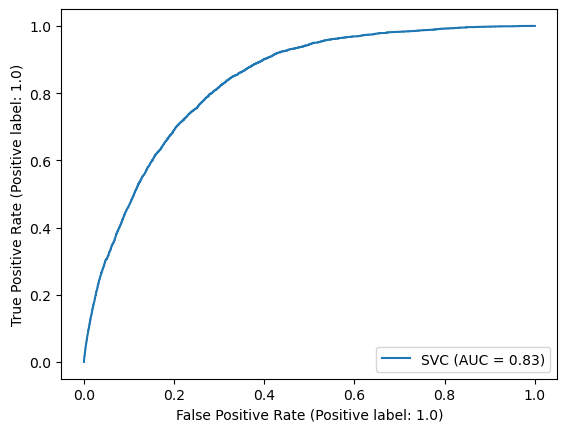

In [43]:
#creation of an ROC curve of our SVC model
#clf=SVC model for reference
svc_display = RocCurveDisplay.from_estimator(clf, X_test, y_test)

The ROC curve shown above represents the performance of our classification model, in our case the SVC model. An ROC curve signifies how well our model is performing by plotting the false positive rate against the true positive rate at different classification thresholds. The AUC is the area under the ROC curve. This metric measures the ability of a binary classifier to distinguish between classes, in other words, a measure of separability. The higher the AUC the better the model. 

For our ROC curve, the AUC is 0.83 showing that the performance of our modal is very good and performing well for our Cadiovascular dataset. We can confidently say our model has a high distinguishing rate between our positive and negative heart disease cases.

### Confusion Matrix

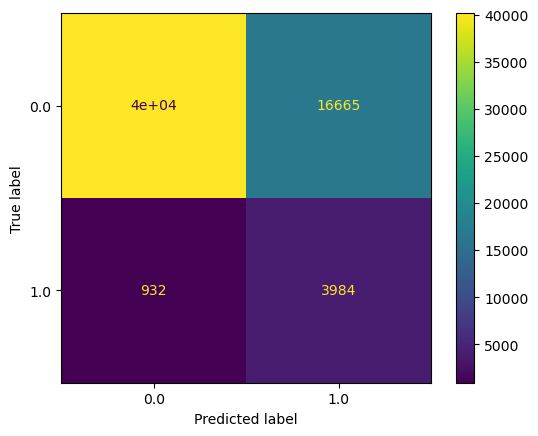

In [44]:
#Conmfusion Matrix for SVC model - calculate based on y_test and predictions made from SVC
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

#Show Graph
plt.show()

A confusion matrix summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. Since class 0 is negative for heart disease in our dataset and class 1 is positive for heart disease, this confusion matrix shows true negatives (TN) on the top left quadrant, false positives (FP) on the top right, false negatives (FN) on the bottom left, and true positives (TP) on the bottom right. The color and number in each quadrant indicates how many samples fall into each category. 

This graph clearly shows the effects of the heavy skew in our dataset. The smallest quadrant in our confusion matrix is the 932 false negatives, which we consider the most expensive type of mistake to make in this scenario. Since this value is relatively low in comparison to our 3984 true positives, we consider this model fairly successful at accomplishing our primary goal of successfully identifying positive cases of heart disease. Due to the disproportionately large amount of actual class 0 samples, we needed to use undersampling to accomplish this, which resulted in a rather high 16665 false positives. Although the number of false positives is much higher than the number of true positives (resulting in a significantly low precision rating), it is still comparatively low compared to the roughly 40000 true negatives. This means our model is fairly accurate in classifying class 0 samples as class 0, and class 1 samples as class 1. Overall, we consider this side affect of using undersampling a worthwhile tradeoff for our purpose of predicting heart disease.

### Precision-Recall Curve

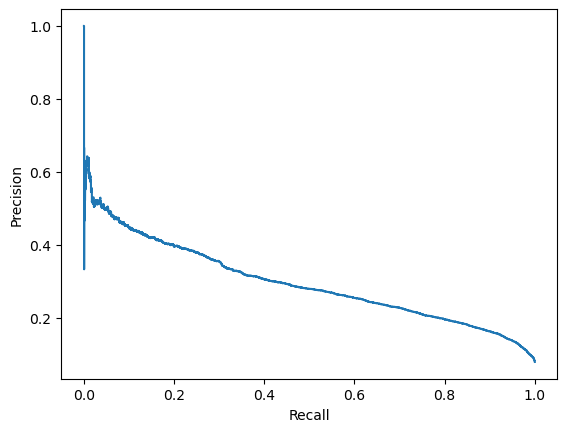

In [45]:
#Creation of Precision-Recall graph using SVC Model
#create scoring for SVC using test set
y_score_test = clf.decision_function(X_test)

#Graph Precision-Recall graph based on calculated scoring and target test set
prec, recall, _ = precision_recall_curve(y_test, y_score_test, pos_label=clf.classes_[1])

#Plot the graph
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


The Precision-Recall curve represents the trade-off between precision and recall for different thresholds in a binary classification model. 

Precision refers to how accurate the model is in identifying the positive class (people who have Heart Disease), while recall refers to the model's ability to capture all instances of the positive class. 

The precision-recall curve is particularly important when a dataset is imbalanced, as it visualizes the trade-off between making accurate positive predictions and capturing all positive instances. 

In our precision-recall curve, the immediate and sharp drop in precision indicates that any increase in recall causes precision to plummet. We interpret this as being largely caused by the extreme imbalance in our dataset, as there is a roughly 10-1 ratio of class 0 to class 1, so any reasonable recall rate results in a very low precision. 

We consider this trade off worth it since for our purpose of detecting Heart Disease, we value recall for Heart Disease positive samples much more than precision. 

# 6. Limitations

There are several notable limitations that require consideration. Firstly, the dataset used has a significant skew in the distribution of individuals with and without heart disease. We addressed this skew by using undersampling, primarily because the dataset size was relatively large, and we determined oversampling did not make a significant difference to the precision, recall or accuracy of our models. A side effect of undersampling is that the model tends to over-prioritize the prediction of individuals with heart disease, leading to a decrease in precision for class 1 (individuals with heart disease) but an increase in class 1 recall. Undersampling also means losing some of the dataset, which may have contained valuable data. We deemed these trade-offs worthwhile, as we prioritise correctly identifying individuals with heart disease over precision for those without the condition.

Secondly, our data primarily comes from self-reports via interviews and surveys. This introduces the possibility of errors, inconsistencies, and inaccuracies in the dataset, which could impact the reliability of the model's predictions. Additionally, the Age Category feature, which had the highest correlation to our prediction target, is recorded in categorical ranges rather than precise individual ages. This may limit this feature's predictive value.

Lastly, the generalizability of our model is limited, as the vast majority of the dataset was collected from a specific geographical area (America). Therefore, the model may not be applicable to populations outside of the sampled region, due to variation in cultural, socioeconomic, and healthcare factors.


## Next Steps

For our next steps, we plan to expand our dataset by collecting more diverse data from different regions to improve the generalizability of our model. Additionally, we wish to explore more resource-intensive methods like neural networks, boosting techniques, and other ensemble methods to improve predictive accuracy. Our goal remains to create a predictive model that serves as the initial step in a pipeline for identifying individuals at high risk of heart disease, thereby enabling early intervention.
